# Dimensionality Reduction

Dataset: MNIST

Tasks: reduce the dataset’s dimensionality (PCA, t-SNE, LLE, MDS, LDA), then apply classification
(Logistic, SVM, Random Forest)

Hints: sklearn.decomposition, PCA(), IncrementalPCA(), KernelPCA()

### Import data set

In [4]:
pip install pandas numpy matplotlib sklearn

Python(47161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract features and target
X, y = mnist['data'], mnist['target']
# Get the first 1000 rows because of performance reasons
X = X[:1000]
y = y[:1000]

print("Fetching data DONE")

Fetching data DONE


Shape of the data: (1000, 784)
Shape of the target: (1000,)


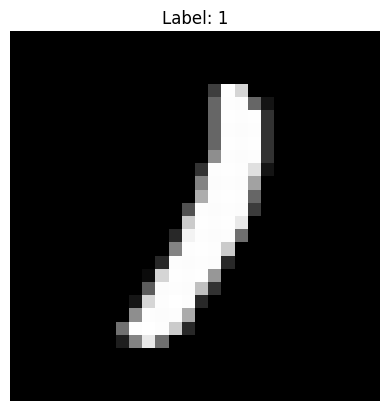

In [21]:
# Look at the shape of the data
print("Shape of the data:", X.shape)  # (70000, 784)
print("Shape of the target:", y.shape)  # (70000,)

# Extract 1 data point
sample_index = 78
sample_data = X.iloc[sample_index]
sample_label = y.iloc[sample_index]

# Reshape the data point into a 28x28 matrix
sample_image = sample_data.values.reshape(28, 28)

# Visualize the reshaped data point
plt.imshow(sample_image, cmap='gray')
plt.title(f'Label: {sample_label}')
plt.axis('off')
plt.show()

### Projection using Ordinary PCA

### Standardise the data

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

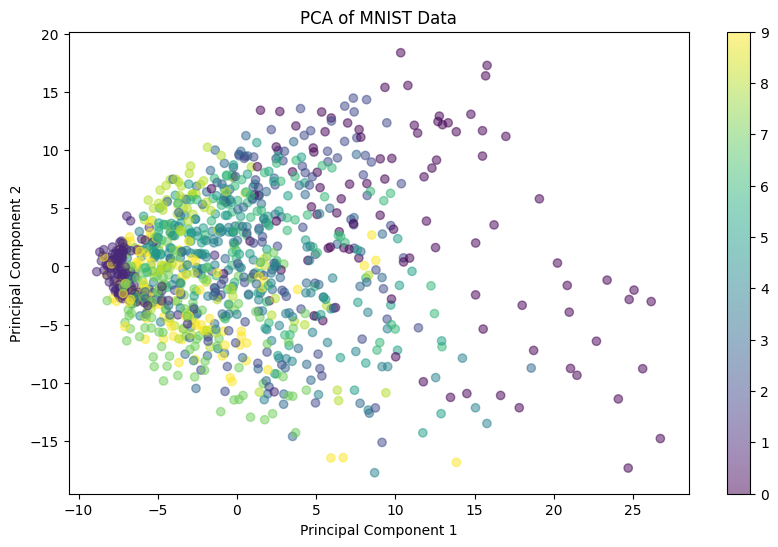

In [23]:
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
# Let's say we have new dimensions Principal Component 1 and Principal Component 2
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Plot the principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=y.astype(int), cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MNIST Data')
plt.colorbar()
plt.show()

### Projection using Incremental PCA

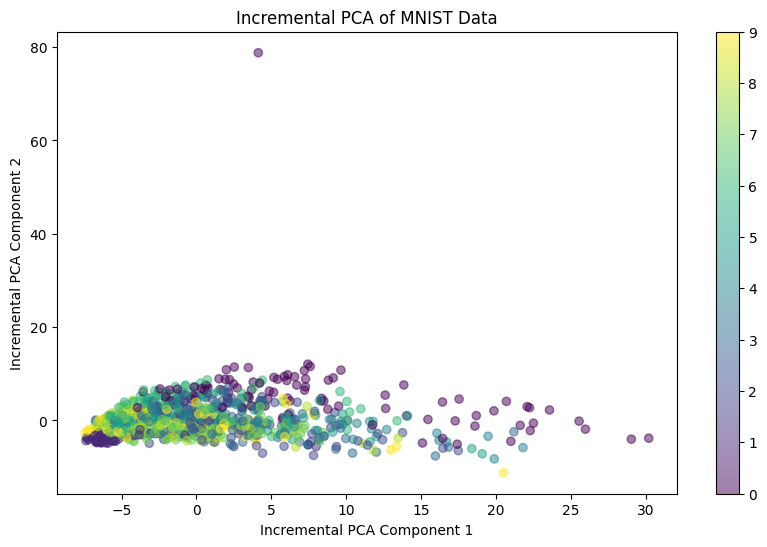

In [24]:
from sklearn.decomposition import IncrementalPCA

# Apply Incremental PCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=2)

for X_batch in np.array_split(scaled_features, n_batches):
    inc_pca.partial_fit(X_batch)

inc_pca_components = inc_pca.transform(scaled_features)

# Create a DataFrame with the Incremental PCA components
inc_pca_df = pd.DataFrame(data=inc_pca_components, columns=['Incremental PCA Component 1', 'Incremental PCA Component 2'])

# Plot the Incremental PCA components
plt.figure(figsize=(10, 6))
plt.scatter(inc_pca_df['Incremental PCA Component 1'], inc_pca_df['Incremental PCA Component 2'], c=y.astype(int), cmap='viridis', alpha=0.5)
plt.xlabel('Incremental PCA Component 1')
plt.ylabel('Incremental PCA Component 2')
plt.title('Incremental PCA of MNIST Data')
plt.colorbar()
plt.show()

### Using Kernel PCA

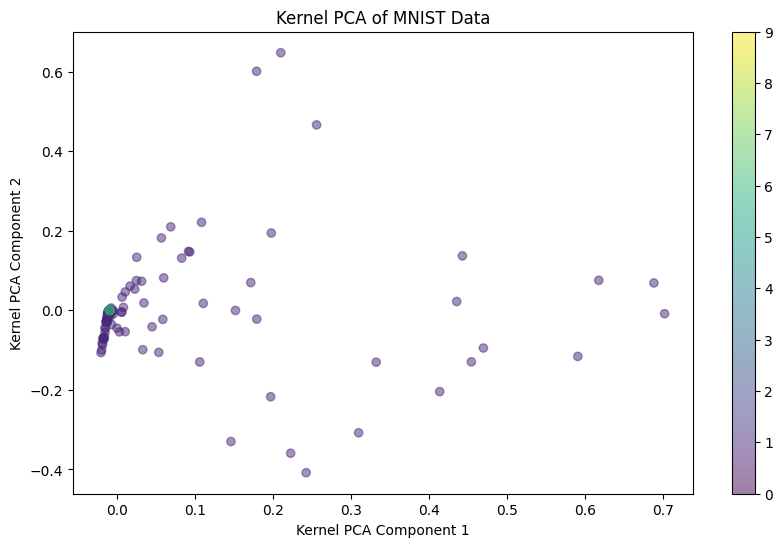

In [25]:
from sklearn.decomposition import KernelPCA

# Apply Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
kernel_pca_components = kernel_pca.fit_transform(scaled_features)

# Create a DataFrame with the Kernel PCA components
kernel_pca_df = pd.DataFrame(data=kernel_pca_components, columns=['Kernel PCA Component 1', 'Kernel PCA Component 2'])

# Plot the Kernel PCA components
plt.figure(figsize=(10, 6))
plt.scatter(kernel_pca_df['Kernel PCA Component 1'], kernel_pca_df['Kernel PCA Component 2'], c=y.astype(int), cmap='viridis', alpha=0.5)
plt.xlabel('Kernel PCA Component 1')
plt.ylabel('Kernel PCA Component 2')
plt.title('Kernel PCA of MNIST Data')
plt.colorbar()
plt.show()

In [ ]:
# Split the dataset:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define the target variable and features
X = pca_df
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Classification

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)

print(f'Logistic Regression Accuracy: {accuracy_log_reg}')
print('Logistic Regression Classification Report:')
print(report_log_reg)

Logistic Regression Accuracy: 0.275
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.74      0.58        19
           1       0.46      0.90      0.61        20
           2       0.13      0.14      0.13        22
           3       0.00      0.00      0.00        26
           4       0.11      0.27      0.15        15
           5       0.00      0.00      0.00        17
           6       0.18      0.13      0.15        23
           7       0.28      0.21      0.24        24
           8       0.28      0.62      0.38        13
           9       0.00      0.00      0.00        21

    accuracy                           0.28       200
   macro avg       0.19      0.30      0.22       200
weighted avg       0.19      0.28      0.21       200



/Users/hungnguy/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hungnguy/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hungnguy/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print('Random Forest Classification Report:')
print(report_rf)

Random Forest Accuracy: 0.3
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.53      0.48        19
           1       0.58      0.75      0.65        20
           2       0.12      0.09      0.10        22
           3       0.17      0.19      0.18        26
           4       0.17      0.20      0.18        15
           5       0.26      0.29      0.28        17
           6       0.10      0.04      0.06        23
           7       0.36      0.33      0.35        24
           8       0.22      0.31      0.26        13
           9       0.41      0.33      0.37        21

    accuracy                           0.30       200
   macro avg       0.28      0.31      0.29       200
weighted avg       0.28      0.30      0.29       200



### SVM

In [29]:
from sklearn.svm import SVC

# Create and train the SVM model
svm_clf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')
print('SVM Classification Report:')
print(report_svm)

SVM Accuracy: 0.335
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.74      0.61        19
           1       0.46      0.85      0.60        20
           2       0.30      0.14      0.19        22
           3       0.50      0.08      0.13        26
           4       0.17      0.67      0.27        15
           5       0.00      0.00      0.00        17
           6       0.22      0.22      0.22        23
           7       0.33      0.42      0.37        24
           8       0.55      0.46      0.50        13
           9       0.00      0.00      0.00        21

    accuracy                           0.34       200
   macro avg       0.30      0.36      0.29       200
weighted avg       0.31      0.34      0.28       200



/Users/hungnguy/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hungnguy/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hungnguy/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le